# Machine Learning

 - Aprendizado Supervionado
    - Classificação
    - Regressão
 - Aprendizado Não-supervisionado
    - Agrupamento
    - Redução de dimensionalidade
 - Aprendizado Semi-supervisionado
 - Aprendizado por reforço

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install scikit-learn

## Classificação

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


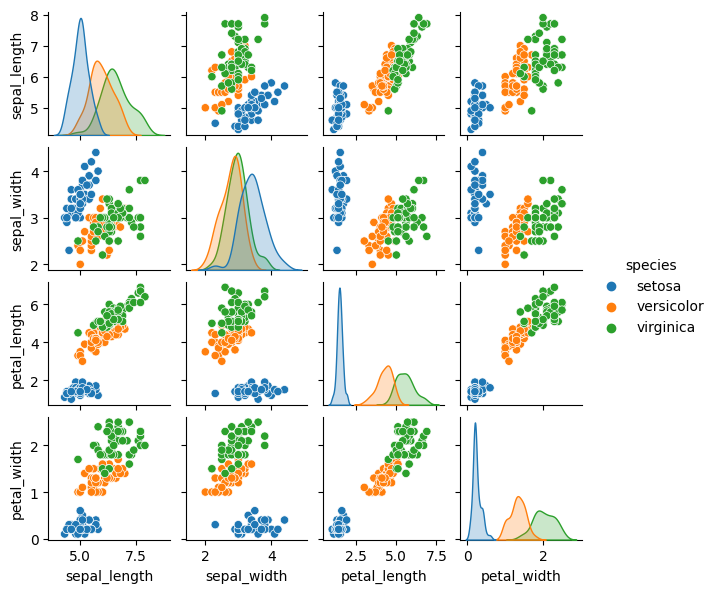

In [4]:
sns.pairplot(iris, hue='species',height=1.5)

In [5]:
X_iris = iris.drop('species',axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

In [7]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_iris,y_iris)

GaussianNB()

In [8]:
clf.predict([[5.1,3.5,1.4,3]])

c:\Users\rcpsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['virginica'], dtype='<U10')

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_iris,y_iris)

DecisionTreeClassifier()

In [10]:
clf.predict([[5.1,3.5,1.4,3]])

c:\Users\rcpsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_iris)
y_iris_cod = le.transform(y_iris)
print(y_iris_cod)
print(y_iris)
y_iris = y_iris_cod

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [12]:
from sklearn.inspection import DecisionBoundaryDisplay

feature1, feature2 = np.meshgrid(
    np.linspace(iris['petal_width'].min(),iris['petal_width'].max()),
    np.linspace(iris['petal_length'].min(),iris['petal_length'].max())
)

In [13]:
grid = np.vstack([feature1.ravel(), feature2.ravel()]).T
clf_dt = DecisionTreeClassifier(random_state=22)
clf_nb = GaussianNB()

clf_dt.fit(X_iris[['petal_width','petal_length']], y_iris)
clf_nb.fit(X_iris[['petal_width','petal_length']], y_iris)

GaussianNB()

In [14]:
y_pred_dt = np.reshape(clf_dt.predict(grid), feature1.shape)
y_pred_nb = np.reshape(clf_nb.predict(grid), feature1.shape)

c:\Users\rcpsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\rcpsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [15]:
y_pred_nb

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

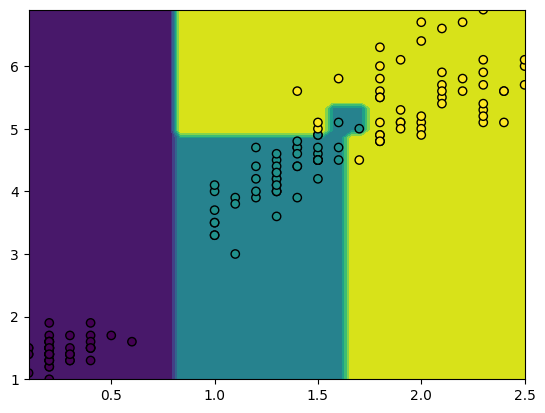

In [16]:
display = DecisionBoundaryDisplay(xx0=feature1,xx1=feature2,response=y_pred_dt)
display.plot()
display.ax_.scatter(X_iris['petal_width'],X_iris['petal_length'],c=y_iris,edgecolor='black')

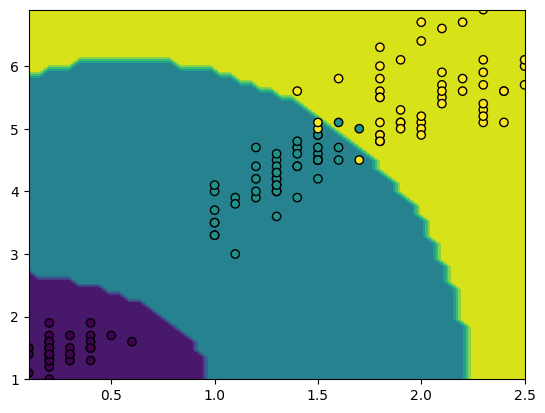

In [17]:
display = DecisionBoundaryDisplay(xx0=feature1,xx1=feature2,response=y_pred_nb)
display.plot()
display.ax_.scatter(X_iris['petal_width'],X_iris['petal_length'],c=y_iris,edgecolor='black')

## Regressão

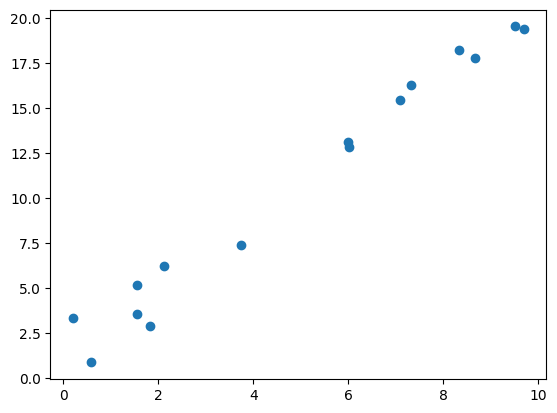

In [23]:
rng = np.random.RandomState(42)
n = 15
x = 10 * rng.rand(n)
y = 2*x - 1 + rng.rand(n)*5
plt.scatter(x,y)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression(fit_intercept=True)

In [28]:
X = x.reshape(-1,1)
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967]])

In [29]:
model.fit(X,y)

LinearRegression()

In [30]:
model.coef_

array([1.96339513])

In [31]:
model.intercept_

1.0941846271954976

In [32]:
xfit = np.linspace(-1,11).reshape(-1,1)
yfit = model.predict(xfit)

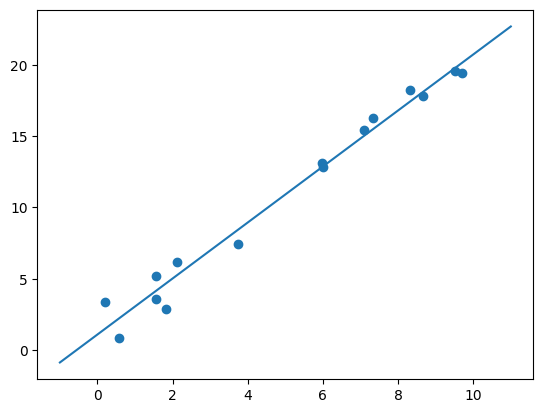

In [34]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

## Agrupamento (Clustering)

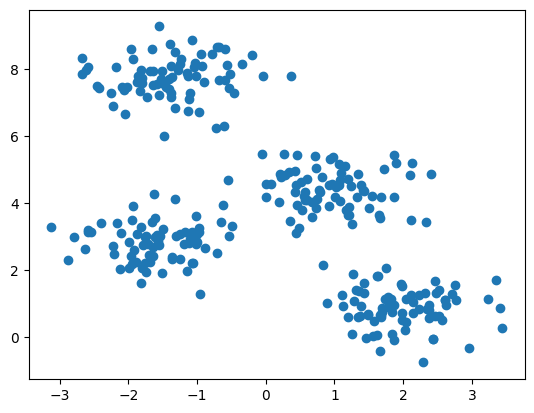

In [42]:
from sklearn.datasets import make_blobs

X , y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

plt.scatter(X[:,0],X[:,1])

In [44]:
from sklearn.cluster import KMeans

In [47]:
km = KMeans(n_clusters=3)
km.fit(X)
y_km = km.predict(X)

c:\Users\rcpsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


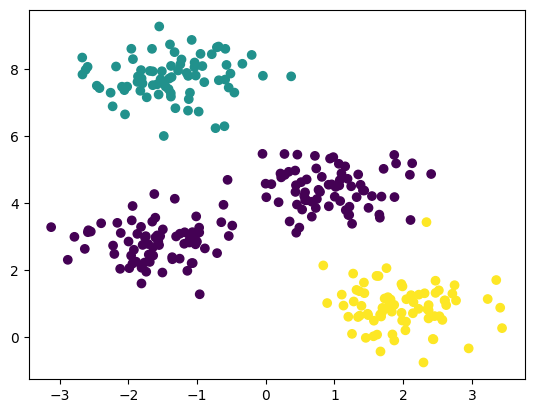

In [48]:
plt.scatter(X[:,0],X[:,1], c = y_km)